<a href="https://colab.research.google.com/github/sowjanyakodam/AICTE-A-project-on-Image-Classification-using-ML-model/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**seeding for reproducibility**


In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input  # Import the Input function
from tensorflow.keras import layers,models


**Data Curation**

Upload the kaggle.json file

In [3]:
pip install kaggle

In [4]:
kaggle_credentials=json.load(open('kaggle.json'))


In [5]:
#setup kaggle API key as environment variables
import json
kaggle_credentials=json.load(open('kaggle.json'))

os.environ['KAGGLE_USERNAME']=kaggle_credentials['username']
os.environ['KAGGLE_KEY']=kaggle_credentials['key']

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
from zipfile import ZipFile

# Replace 'plantvillage-dataset.zip' with the actual downloaded filename if it's different
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('plantvillage_data')

In [8]:
!ls

best_model.keras  drive  kaggle.json  plantvillage_data  plantvillage-dataset.zip  sample_data


In [9]:
import os
print(os.listdir("plantvillage_data"))
print(os.listdir("plantvillage_data/plantvillage dataset"))

['plantvillage dataset']
['color', 'segmented', 'grayscale']


In [10]:
print(os.listdir("plantvillage_data"))
print(os.listdir("plantvillage_data/plantvillage dataset"))

print(len(os.listdir("plantvillage_data/plantvillage dataset/segmented")))
print(os.listdir("plantvillage_data/plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage_data/plantvillage dataset/color")))
print(os.listdir("plantvillage_data/plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage_data/plantvillage dataset/grayscale")))
print(os.listdir("plantvillage_data/plantvillage dataset/grayscale")[:5])


['plantvillage dataset']
['color', 'segmented', 'grayscale']
38
['Apple___Apple_scab', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Septoria_leaf_spot']
38
['Apple___Apple_scab', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Septoria_leaf_spot']
38
['Apple___Apple_scab', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Septoria_leaf_spot']


**Number of Classes = 38**

In [12]:
print(len(os.listdir("plantvillage_data/plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage_data/plantvillage dataset/color/Grape___healthy")[:5])

423
['c05f4201-5ab9-4bbd-b19e-c36515b7b3a9___Mt.N.V_HL 6134.JPG', '5a165993-9c98-476f-a818-0145dd33f18e___Mt.N.V_HL 8932.JPG', 'f72e0604-9654-48b4-b153-2e92383970ce___Mt.N.V_HL 8979.JPG', '1c13c447-4d2d-4eac-9835-705d952b09d6___Mt.N.V_HL 9128.JPG', '5d03624b-61fe-4764-944e-c2a347e99889___Mt.N.V_HL 6192.JPG']


**Data Preprocessing**

In [11]:
# Dataset Path
base_dir = 'plantvillage_data/plantvillage dataset/color'

(256, 256, 3)


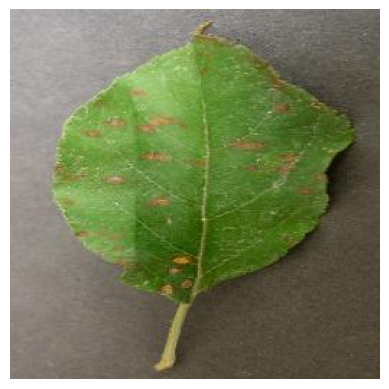

In [13]:
image_path = '/content/plantvillage_data/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [14]:

image_path = '/content/plantvillage_data/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [15]:

# Image Parameters
img_size = 224
batch_size = 32


**Train Test Split**

In [16]:
# Image Data Generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)


In [17]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)



Found 43456 images belonging to 38 classes.


In [18]:

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [19]:

from tensorflow.keras import layers, models

# Define the input layer explicitly
model = models.Sequential()

model.add(layers.InputLayer(shape=(img_size, img_size, 3)))  # Define shape here
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


In [20]:


# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [22]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 135s 93ms/step - accuracy: 0.6002 - loss: 1.8762 - val_accuracy: 0.8383 - val_loss: 0.5011
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.9145
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 153s 76ms/step - accuracy: 0.9205 - loss: 0.2518 - val_accuracy: 0.8682 - val_loss: 0.4396
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 2.4795e-05
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 103s 76ms/step - accuracy: 0.9638 - loss: 0.1098 - val_accuracy: 0.8685 - val_loss: 0.4816


**Model Evaluation**

In [23]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8721 - loss: 0.4675
Validation Accuracy: 86.85%


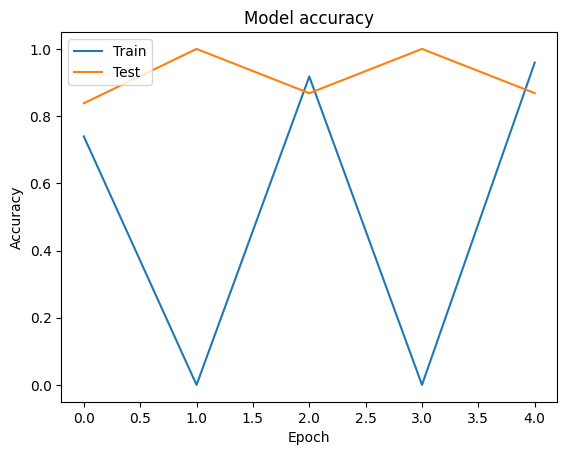

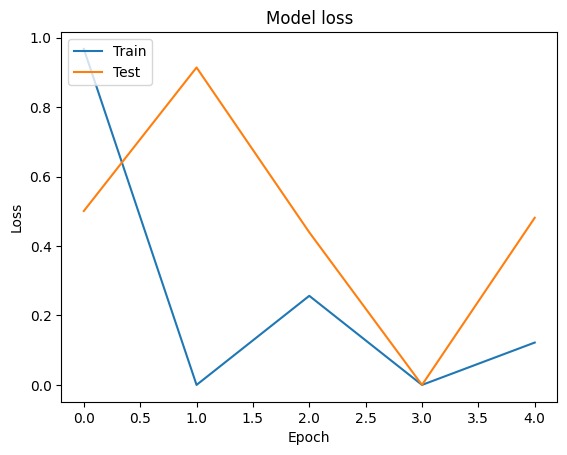

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [25]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [26]:

# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [27]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [28]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [40]:

# Example Usage
image_path = '/content/test_apple_black_rot.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Predicted Class Name: Apple___Black_rot


**Saving the model to Google drive**

In [41]:
model.save('drive/MyDrive/Colab Notebooks/trained_models/plant_disease_prediction_model.keras')